# Data Collection and Transformation:

In [167]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
import json 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from sklearn.cluster import KMeans
import sys
import folium 

print('Libraries imported.')

Libraries imported.


In [3]:
url="https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi"
req=requests.get(url)

In [4]:
soup = bs(req.content,'lxml')

In [5]:
l={}
for item in soup.find_all('li')[:9]:
    l[item.text[2:]]=[]
keys=list(l.keys())

for item in soup.find_all('li')[12:30]:
    l[keys[0]].append(item.text)

for item in soup.find_all('li')[30:57]:
    l[keys[1]].append(item.text)

for item in soup.find_all('li')[57:71]:
    l[keys[2]].append(item.text)

for item in soup.find_all('li')[71:79]:
    l[keys[3]].append(item.text)

for item in soup.find_all('li')[79:89]:
    l[keys[4]].append(item.text)

for item in soup.find_all('li')[89:108]:
    l[keys[5]].append(item.text)

for item in soup.find_all('li')[108:157]:
    l[keys[6]].append(item.text)

for item in soup.find_all('li')[157:178]:
    l[keys[7]].append(item.text)

for item in soup.find_all('li')[178:198]:
    l[keys[8]].append(item.text)

In [6]:
res={'Districts':[],'Neighborhoods':[]}
for key in l.keys():
    dis=key
    for sub in l[key]:
        res['Districts'].append(dis)
        res['Neighborhoods'].append(sub)

In [7]:
pd.DataFrame(res)

,Districts,Neighborhoods
0,North West Delhi,Adarsh Nagar
1,North West Delhi,Ashok Vihar
2,North West Delhi,Azadpur
3,North West Delhi,Bawana
4,North West Delhi,Begum Pur
5,North West Delhi,Dhaka
6,North West Delhi,Jahangirpuri
7,North West Delhi,Karala
8,North West Delhi,Keshav Puram
9,North West Delhi,Kingsway Camp


Total 186 neighborhoods

In [10]:
res_add={'Latitude':[],'Longitude':[]}
tot=len(res['Districts'])
r=1
geolocator = Nominatim(user_agent="dl_explorer")
for dis,sub in zip(res["Districts"],res['Neighborhoods']):
    add=sub+" "+dis+" Delhi"
    lat=""
    max_at=0
    while lat=="":
        max_at+=1
        out=str(round(r/tot*100,2))+ " % "
        sys.stdout.write('\r'+out+add)
        if max_at==10:
            break
        try: 
            location = geolocator.geocode(add)
            lat = location.latitude
            lng = location.longitude
            
        except: continue
    r+=1
    try:
        location = geolocator.geocode(sub+" Delhi")
        lat = location.latitude
        lng = location.longitude
    except:
        lat=0
        lng=0
    
    res_add['Latitude'].append(lat)
    res_add['Longitude'].append(lng)

100.0 % Vikaspuri West Delhi Delhihihiielhihielhi

In [11]:
neighborhoods=pd.DataFrame({**res,**res_add})
neighborhoods.drop(neighborhoods[neighborhoods['Latitude']==0].index,axis=0,inplace=True)

neighborhoods

,Districts,Neighborhoods,Latitude,Longitude
0,North West Delhi,Adarsh Nagar,28.714401,77.167288
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
5,North West Delhi,Dhaka,28.708698,77.205749
6,North West Delhi,Jahangirpuri,28.725972,77.162658
7,North West Delhi,Karala,28.735140,77.032511
8,North West Delhi,Keshav Puram,28.688926,77.161683
9,North West Delhi,Kingsway Camp,28.698778,77.204626
10,North West Delhi,Kohat Enclave,28.698041,77.140539


Neighborhoods with their location data combined

In [12]:
address = 'Delhi'

geolocator = Nominatim(user_agent="dl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Delhi are 28.6517178, 77.2219388.


In [13]:
Delhi_Map=folium.Map(location=[latitude,longitude],zoom_start=10)
for sub,lat,lng in zip(neighborhoods['Neighborhoods'],neighborhoods['Latitude'],neighborhoods['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=sub,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Delhi_Map)
Delhi_Map

Foursquare Credentials

In [169]:
CLIENT_ID = 'XXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXX
CLIENT_SECRET:XXXX


Collecting data of each neighborhood from Foursquare API

In [15]:
LIMIT=100
radius=1500
venues_all={'Neighborhood':[], 'Neighborhood Latitude':[], 'Neighborhood Longitude':[],
       'Venue':[], 'Venue Latitude':[], 'Venue Longitude':[], 'Venue Category':[]}
for n_name,n_lat,n_lng in neighborhoods.values[:,1:]:
    url=url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    n_lat,
    n_lng,
    radius, 
    LIMIT)
    try:
        results=requests.get(url).json()['response']['groups'][0]['items']
    except:
        results=requests.get(url).json()    
    for row in results:
        keys=list(venues_all.keys())
        venues_all[keys[0]].append(n_name)
        venues_all[keys[1]].append(n_lat)
        venues_all[keys[2]].append(n_lng)
        venues_all[keys[3]].append(row['venue']['name'])
        venues_all[keys[4]].append(row['venue']['location']['lat'])
        venues_all[keys[5]].append(row['venue']['location']['lng'])
        venues_all[keys[6]].append(row['venue']['categories'][0]['name'])
    print(n_name)

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sadar Bazaar
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Shastri Nagar
Tis Hazari
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Mukherjee Nagar
Nand Nagri
Naveen Shahdara
New Usmanpur
Sadatpur
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Sadar Bazaar
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Patparg

In [16]:
delhi_venues=pd.DataFrame(venues_all).drop_duplicates(['Venue','Venue Latitude','Venue Longitude'])

delhi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.714401,77.167288,Shalimar bagh club,28.711882,77.157933,Indian Restaurant
1,Adarsh Nagar,28.714401,77.167288,Ever Bake,28.706419,77.162607,Bakery
2,Adarsh Nagar,28.714401,77.167288,Domino's Pizza,28.706000,77.163000,Pizza Place
3,Adarsh Nagar,28.714401,77.167288,Cafe Coffee Day,28.707934,77.161478,Coffee Shop
4,Adarsh Nagar,28.714401,77.167288,Adarsh Nagar Metro Station,28.716598,77.170436,Light Rail Station


In [17]:
print("Total Outlets in Delhi:",len(delhi_venues))

Total Outlets in Delhi: 2080


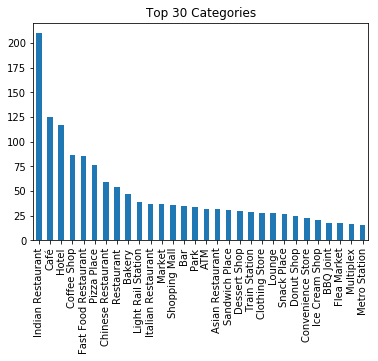

In [168]:
plt.figure()
delhi_venues['Venue Category'].value_counts()[:30].plot(kind='bar')
plt.title('Top 30 Categories')
plt.show()

# Analysing the Data

Grouping each neighborhood and calculating total venues in each area

In [18]:
delhi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adarsh Nagar,11,11,11,11,11,11
Alaknanda,38,38,38,38,38,38
Anand Vihar,16,16,16,16,16,16
Ashok Nagar,41,41,41,41,41,41
Ashok Vihar,19,19,19,19,19,19
Azadpur,6,6,6,6,6,6
Babarpur,7,7,7,7,7,7
Badarpur,6,6,6,6,6,6
Bali Nagar,31,31,31,31,31,31


In [19]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))

There are 218 uniques categories.


Converting the data into Onehot table of categories for clustering them

In [20]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhoods'] = delhi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head()

,Neighborhoods,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Track,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
delhi_grouped=delhi_onehot.groupby('Neighborhoods').mean().reset_index()

delhi_grouped

,Neighborhoods,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Track,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store
0,Adarsh Nagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
1,Alaknanda,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
2,Anand Vihar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
3,Ashok Nagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.024390,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
4,Ashok Vihar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
5,Azadpur,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.166667,0.00000,0.0000,0.0
6,Babarpur,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
7,Badarpur,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.166667,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
8,Bali Nagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0
9,Bara Hindu Rao,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.142857,0.0,0.0,0.00000,0.000000,0.00000,0.0000,0.0


Top 5 categories in each neighborhood

In [22]:
num_top_venues = 5

for hood in delhi_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = delhi_grouped[delhi_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    temp = temp.drop(temp[temp.values==0].index)
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adarsh Nagar----
                venue  freq
0   Convenience Store  0.18
1  Light Rail Station  0.18
2              Bakery  0.09
3         Bus Station  0.09
4         Coffee Shop  0.09


----Alaknanda----
               venue  freq
0         Restaurant  0.08
1        Coffee Shop  0.08
2             Market  0.08
3  Indian Restaurant  0.08
4   Asian Restaurant  0.05


----Anand Vihar----
            venue  freq
0   Movie Theater  0.12
1     Pizza Place  0.12
2          Bakery  0.06
3            Café  0.06
4  Clothing Store  0.06


----Ashok Nagar----
               venue  freq
0  Indian Restaurant  0.10
1         Restaurant  0.07
2          Multiplex  0.05
3             Bakery  0.05
4               Café  0.05


----Ashok Vihar----
               venue  freq
0        Pizza Place  0.16
1        Coffee Shop  0.11
2  Indian Restaurant  0.11
3     Sandwich Place  0.11
4   Asian Restaurant  0.05


----Azadpur----
                           venue  freq
0                    Snack Place  0.33

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [145]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhoods']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Convenience Store,Light Rail Station,Pizza Place,Gym / Fitness Center,Coffee Shop,Bus Station,Bakery,Park,Indian Restaurant,Food Court
1,Alaknanda,Restaurant,Market,Coffee Shop,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Asian Restaurant,Pizza Place,BBQ Joint
2,Anand Vihar,Pizza Place,Movie Theater,Dessert Shop,Clothing Store,Food Court,Shopping Mall,Shop & Service,Multiplex,Café,Bakery
3,Ashok Nagar,Indian Restaurant,Restaurant,Ice Cream Shop,Coffee Shop,Shopping Mall,Bakery,Café,Fast Food Restaurant,Multiplex,Donut Shop
4,Ashok Vihar,Pizza Place,Indian Restaurant,Coffee Shop,Sandwich Place,Asian Restaurant,Light Rail Station,Food Truck,Fast Food Restaurant,Donut Shop,Department Store


<a id='item4'></a>

Running *k*-means to cluster the neighborhood into 10 clusters.

In [146]:
# set number of clusters
kclusters = 10

delhi_grouped_clustering = delhi_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 5, 5, 5, 5, 5, 5, 0, 5, 5])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [147]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

delhi_merged.drop(delhi_merged[delhi_merged['Cluster Labels']==np.nan].index,axis=0,inplace=True)

delhi_merged.head() # check the last columns!

,Districts,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.714401,77.167288,5.0,Convenience Store,Light Rail Station,Pizza Place,Gym / Fitness Center,Coffee Shop,Bus Station,Bakery,Park,Indian Restaurant,Food Court
1,North West Delhi,Ashok Vihar,28.699453,77.184826,5.0,Pizza Place,Indian Restaurant,Coffee Shop,Sandwich Place,Asian Restaurant,Light Rail Station,Food Truck,Fast Food Restaurant,Donut Shop,Department Store
2,North West Delhi,Azadpur,28.707657,77.175547,5.0,Snack Place,Department Store,Vegetarian / Vegan Restaurant,Frozen Yogurt Shop,Bakery,Fast Food Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck
3,North West Delhi,Bawana,28.799660,77.032885,9.0,ATM,Playground,Farmers Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
5,North West Delhi,Dhaka,28.708698,77.205749,5.0,Pizza Place,Bakery,Ice Cream Shop,Coffee Shop,Train Station,Lake,Food & Drink Shop,Fish Market,Flea Market,Food


In [148]:
delhi_merged.dropna(inplace=True)

In [149]:
delhi_merged.shape

(154, 15)

Finally, let's visualize the resulting clusters

In [162]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude']
                                  , delhi_merged['Neighborhoods'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Seeing the properties of each Cluster

In [163]:
def define_cluster_feat(c_num):
    final={}
    data=delhi_merged[delhi_merged['Cluster Labels']==c_num].iloc[:,[1]+list(range(5,15))].values[:,1:]
    for row in data:
        for asset in row:
            final[asset]=final.get(asset,0)+1
    df_val=pd.DataFrame.from_dict(final,orient='index').sort_values(0,ascending=False)
    df_val.mean()
    num_rows=len(df_val)
    for row in range(num_rows): 
        df_val.iloc[row,0]=df_val.iloc[row,0]/num_rows
    df_val=df_val.head()
    print("---Cluster"+str(c_num+1)+"---")
    for value in df_val.index:
        print(value)
    print("")

In [164]:
for cluster in range(kclusters):
    define_cluster_feat(cluster)

---Cluster1---
Hotel
Frozen Yogurt Shop
Fried Chicken Joint
French Restaurant
Food Truck

---Cluster2---
ATM
Furniture / Home Store
Frozen Yogurt Shop
Fried Chicken Joint
French Restaurant

---Cluster3---
Indian Restaurant
Fried Chicken Joint
Food Truck
French Restaurant
Women's Store

---Cluster4---
Chinese Restaurant
Women's Store
Farmers Market
Furniture / Home Store
Frozen Yogurt Shop

---Cluster5---
Hindu Temple
Women's Store
Fast Food Restaurant
Furniture / Home Store
Frozen Yogurt Shop

---Cluster6---
Indian Restaurant
Fast Food Restaurant
Café
Pizza Place
Coffee Shop

---Cluster7---
Furniture / Home Store
Frozen Yogurt Shop
Fried Chicken Joint
French Restaurant
Food Truck

---Cluster8---
French Restaurant
Frozen Yogurt Shop
Food Truck
Fried Chicken Joint
Furniture / Home Store

---Cluster9---
Department Store
Fast Food Restaurant
Gaming Cafe
Furniture / Home Store
Frozen Yogurt Shop

---Cluster10---
ATM
Frozen Yogurt Shop
Fried Chicken Joint
French Restaurant
Food Truck



Total neighborhoods in each cluster

In [153]:
delhi_merged["Cluster Labels"].value_counts()

5.0    96
0.0    19
2.0    15
9.0    10
7.0     4
1.0     4
6.0     3
8.0     1
3.0     1
4.0     1
Name: Cluster Labels, dtype: int64